<a href="https://colab.research.google.com/github/joaquinhojman/Entrenamieto_ECI_2020/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Como levantar un archivo desde colab? https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#Repositorio: https://github.com/joaquinhojman/Entrenamieto_ECI_2020

url = 'https://raw.githubusercontent.com/joaquinhojman/Entrenamieto_ECI_2020/main/Entrenamieto_ECI_2020.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
#cantidad de columnas de la abse
len(df.columns)

52

In [ ]:
#cantidad de filas de la base
len(df)

16947

In [ ]:
#Estadisticas de la base
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [ ]:
#informacion sobre las columnas de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
#Me interesa ver la distribucion de las ventas exitosas y fallidas en el tiempo
#empiezo con las ventas exitosas
df['Stage'] = df['Stage'].astype('category') #convierto la columna stage a tipo category
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])  #convierto la columna a date time
df_exito = df[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_exito = df_exito[df_exito['Stage'] == 'Closed Won']  #dejo solo los closed won
df_exito

,Stage,Planned_Delivery_Start_Date
1,Closed Won,2016-01-18
2,Closed Won,2016-01-25
7,Closed Won,2016-01-25
23,Closed Won,2016-01-09
63,Closed Won,2016-01-18
...,...,...
16937,Closed Won,2016-02-01
16939,Closed Won,2016-04-01
16942,Closed Won,2016-03-21
16943,Closed Won,2016-04-04


Text(0, 0.5, 'Densidad')

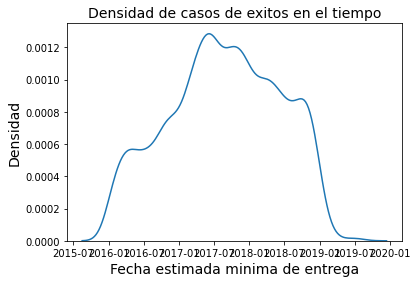

In [ ]:
#Grafico los exitos en el tiempo

g = sns.kdeplot(df_exito["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de exitos en el tiempo",fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega",fontsize=14)
g.set_ylabel("Densidad",fontsize=14)

In [ ]:
#Ahora buscamos ver las ventas fallidas en funcion del tiempo
df_fracaso = df[['Stage','Planned_Delivery_Start_Date']] #dejo solo las columas que me interesan
df_fracaso = df_fracaso[df_fracaso['Stage'] == 'Closed Lost']  #dejo solo los closed won
df_fracaso

,Stage,Planned_Delivery_Start_Date
0,Closed Lost,2016-05-01
3,Closed Lost,2018-02-01
4,Closed Lost,2018-02-01
5,Closed Lost,2018-02-01
6,Closed Lost,2017-02-01
...,...,...
16938,Closed Lost,2016-08-15
16940,Closed Lost,2016-10-03
16941,Closed Lost,2016-10-03
16945,Closed Lost,2016-04-25


Text(0, 0.5, 'Densidad')

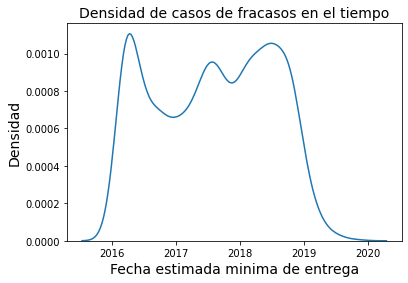

In [ ]:
#Grafico los fracasos en el tiempo

g = sns.kdeplot(df_fracaso["Planned_Delivery_Start_Date"])
g.set_title("Densidad de casos de fracasos en el tiempo",fontsize=14)
g.set_xlabel("Fecha estimada minima de entrega",fontsize=14)
g.set_ylabel("Densidad",fontsize=14)

In [ ]:
#Tambien quiero explorar como se distribuyen los exitos por cada Region.

df_region = df[['Stage','Region']] #dejo solo las columas que me interesan

exitos_region = df_region[df_region['Stage'] == 'Closed Won']  #dejo solo los closed won
exitos_region = exitos_region.groupby('Region').size() 
exitos_region

Region
APAC           1896
Americas       1793
EMEA           2471
Japan          3323
Middle East      50
dtype: int64

Text(0, 0.5, 'Exitos')

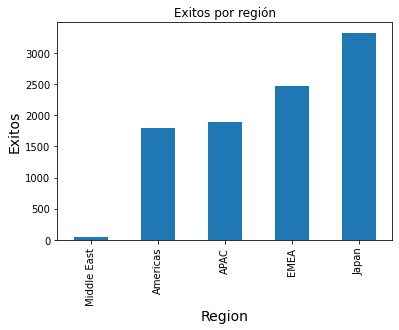

In [ ]:
g = exitos_region.nsmallest().plot.bar()
g.set_title("Exitos por región")
g.set_xlabel("Region",fontsize=14)
g.set_ylabel("Exitos",fontsize=14)


In [ ]:
#Ahora hago lo mismo pero con los fracasos por cada Region.

fracasos_region = df_region[df_region['Stage'] == 'Closed Lost']  #dejo solo los closed won
fracasos_region = fracasos_region.groupby('Region').size() 
fracasos_region

Region
APAC           1355
Americas       2140
EMEA           2189
Japan          1546
Middle East     120
dtype: int64

Text(0, 0.5, 'Exitos')

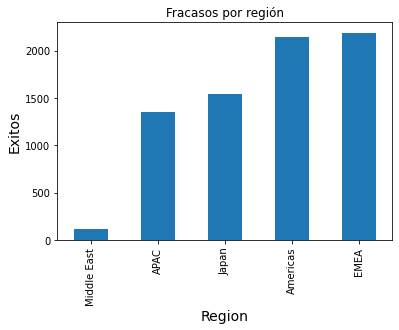

In [ ]:
g = fracasos_region.nsmallest().plot.bar()
g.set_title("Fracasos por región")
g.set_xlabel("Region",fontsize=14)
g.set_ylabel("Exitos",fontsize=14)


In [3]:
#Nos interesa saber si el precio es un factor determinante a la hora de cerrar una venta.
#Para eso analizaremos como se distribuyen los exitos y los fracasos en funcion de la variación de precio.

df['Total_Amount_Currency'] = df['Total_Amount_Currency'].astype('category') #convierto la columna stage a tipo category
stage_precio = df[['ID','Stage','Total_Amount','Total_Amount_Currency']]
stage_precio

,ID,Stage,Total_Amount,Total_Amount_Currency
0,27761,Closed Lost,5272800.00,EUR
1,27760,Closed Won,48230.00,EUR
2,27446,Closed Won,83865.60,USD
3,16808,Closed Lost,7421881.50,USD
4,16805,Closed Lost,13357192.50,USD
...,...,...,...,...
16942,8781,Closed Won,103350.00,EUR
16943,8786,Closed Won,93015.00,EUR
16944,8792,Closed Won,103350.00,EUR
16945,28561,Closed Lost,2346796.88,USD


In [4]:
#No nos sirve en diferentes monedas, conviene convertir todo a dolares.
#Que monedas hay en el df?
stage_precio['Total_Amount_Currency'].values


['EUR', 'EUR', 'USD', 'USD', 'USD', ..., 'EUR', 'EUR', 'EUR', 'USD', 'USD']
Length: 16947
Categories (5, object): ['AUD', 'EUR', 'GBP', 'JPY', 'USD']

In [5]:
#Vemos que las monedas son [AUD, EUR, GBP, JPY, USD]
#Vamos a trabajar en Dolares (USD), usando https://themoneyconverter.com/ES/ al 13/10/2020 obtenemos:
change_USD = 1 #1 dolar EEUU = 1 dolar EEUU
change_EUR = 1.1745 #1 euro = 1,1745 dolares EEUU
change_AUD = 0.71601 # 1 dolar australiano = 0.71601 dolar EEUU
change_JPY = 0.0094800 # 1 yen japones = 0,0094800 dolares EEUU
change_GBP = 1.935 # 1 libra esterlina = 1,2935 dolares EEUU
#Suponemos que la moneda de ninguno de estos paises o zonas (Estados Unidos, Japon, La Union Europea, Gran Bretaña, 
#Australia) tuvo una inflación/deflacion suficientemente significativa por lo cual el tipo de cambio utilizado es
#representativo a pesar de haber sufrido ligeras variaciones en los años que aparecen en la tabla.

In [6]:
#filtramos los datos por moneda
filtro_USD = stage_precio['Total_Amount_Currency'] == 'USD'
filtro_EUR = stage_precio['Total_Amount_Currency'] == 'EUR'
filtro_AUD = stage_precio['Total_Amount_Currency'] == 'AUD'
filtro_JPY = stage_precio['Total_Amount_Currency'] == 'JPY'
filtro_GBP = stage_precio['Total_Amount_Currency'] == 'GBP'

In [8]:
#creamos una df separando por moneda
df_USD = stage_precio[filtro_USD]
df_EUR = stage_precio[filtro_EUR]
df_AUD = stage_precio[filtro_AUD]
df_JPY = stage_precio[filtro_JPY]
df_GBP = stage_precio[filtro_GBP]


In [9]:
#aplicamos los cambios de moneda

df_USD['Total_Amount'] = df_USD['Total_Amount']*change_USD
df_EUR['Total_Amount'] = df_EUR['Total_Amount']*change_EUR
df_AUD['Total_Amount'] = df_AUD['Total_Amount']*change_AUD
df_JPY['Total_Amount'] = df_JPY['Total_Amount']*change_JPY
df_GBP['Total_Amount'] = df_GBP['Total_Amount']*change_GBP


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [10]:
#Ahora uno los data frames con los cambios hechos

df_changed = df_USD.append(df_EUR).append(df_AUD).append(df_JPY).append(df_GBP).drop(['Total_Amount_Currency'], axis=1)
df_changed

,ID,Stage,Total_Amount
2,27446,Closed Won,8.386560e+04
3,16808,Closed Lost,7.421882e+06
4,16805,Closed Lost,1.335719e+07
5,16802,Closed Lost,1.483828e+07
6,16799,Closed Lost,2.659495e+06
...,...,...,...
2299,20861,Closed Lost,3.554750e+06
2300,20878,Closed Lost,3.486483e+06
2301,20881,Closed Lost,3.479691e+06
2302,20884,Closed Lost,3.554750e+06


Text(0, 0.5, 'Precio en dolares')

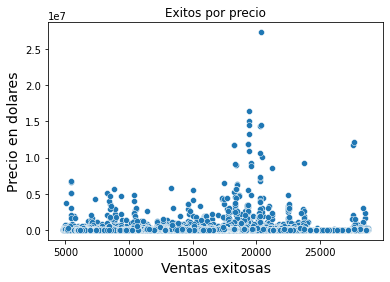

In [11]:
#Finalmente obvtuvimos un data frame con los precios en dolares y el estado final de la ventas
#Ahora podemos observar si los precios mas altos tienen mas ventas fallidas.
#Primero graficamos las ventas exitosas y despues veremos las fallidas

precio_exito = df_changed[df_changed['Stage'] == 'Closed Won']  #dejo solo los closed won

g = sns.scatterplot(x="ID", y="Total_Amount", data=precio_exito)
g.set_title("Exitos por precio")
g.set_xlabel("Ventas exitosas",fontsize=14)
g.set_ylabel("Precio en dolares",fontsize=14)

Text(0, 0.5, 'Precio en dolares')

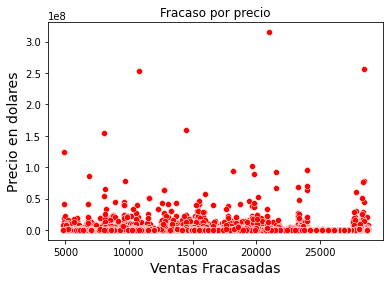

In [12]:
#Ahora veremos las fallidas

precio_fracaso = df_changed[df_changed['Stage'] == 'Closed Lost']  #dejo solo los closed won

g = sns.scatterplot(x="ID", y="Total_Amount", data=precio_fracaso, color="Red")
g.set_title("Fracaso por precio")
g.set_xlabel("Ventas Fracasadas",fontsize=14)
g.set_ylabel("Precio en dolares",fontsize=14)

In [13]:
#Los graficos observados no son concluyentes, el exito de la venta no parece depender del precio.